## Описание проекта
Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Партнёры просят вас подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.
### Описание данных
Таблица rest_data:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

## Шаг №1. Загрузим данные и подготовим их к анализу
Загрузим данные о заведениях общественного питания Москвы. Убедимся, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработаем их.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')
display(df) # взглянем на имеющиеся данные
display(df.info()) # выведем инфо

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

In [3]:
df['object_name'] = df['object_name'].str.lower() # приведем все названия к нижнему регистру

Выявлена проблема в столбце **object_name**. Некоторые названия заведений записаны по-разному, например такие как, старбакс, сабвей, шоколадница итд. Задача непростая, можно решить точечно, например через str.replace, хоть это не очень эффективно, другой вариант поработать с алгоритмами типа расстония Левенштейна, но они не дают 100% точности и не работают для нескольких языков. Более того, надо быть точно уверенным, что "Сабвей" и "Subway" это действительно одно и тоже заведение.  

In [4]:
df['object_name'] = df['object_name'].str.replace('старбакс|starbucks|сторбокс', 'старбакс')
df['object_name'] = df['object_name'].str.replace('кафе шоколадница|кафе «шоколадница»', 'шоколадница')
df['object_name'] = df['object_name'].str.replace('subway', 'сабвей') # вариант точечной замены

In [5]:
print('Количество дубликатов:', df.duplicated().sum()) # выведем кол-во дубликатов
print('Количество пропусков:', df.isna().sum()) # выведем кол-во пропусков

Количество дубликатов: 0
Количество пропусков: id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


In [6]:
plt.style.use('bmh') # зададим стиль графиков
print(plt.style.available)

['_classic_test', 'seaborn-darkgrid', 'seaborn-muted', 'seaborn-white', 'tableau-colorblind10', 'seaborn-whitegrid', 'bmh', 'seaborn-colorblind', 'dark_background', 'seaborn-ticks', 'seaborn-bright', 'fivethirtyeight', 'seaborn-talk', 'seaborn-deep', 'Solarize_Light2', 'classic', 'seaborn-dark-palette', 'ggplot', 'seaborn-dark', 'fast', 'grayscale', 'seaborn-pastel', 'seaborn', 'seaborn-notebook', 'seaborn-paper', 'seaborn-poster']


In [7]:
df_test = df.drop(['id'], axis=1)
df_test.duplicated().sum()

85

In [8]:
#df_test[df_test.duplicated()].head(30)

## Шаг №2. Анализ данных

**Построим график соотношения видов объектов общественного питания по количеству:**

In [9]:
df1 = df.pivot_table(index = 'object_type', values='id', aggfunc='count').reset_index().sort_values(by='id', ascending=False)
df1

,object_type,id
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


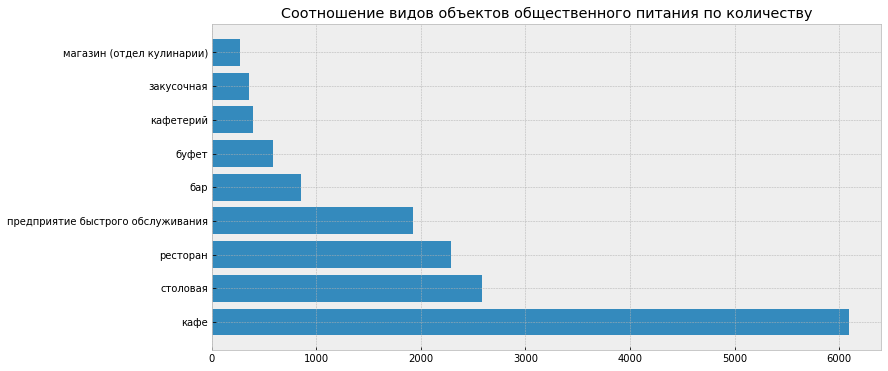

In [10]:
plt.figure(figsize=(12,6))
plt.barh(df1['object_type'], df1['id'])
plt.title('Соотношение видов объектов общественного питания по количеству')
plt.xticks()
plt.show()

**Построим график соотношения сетевых и несетевых заведений по количеству:**

In [11]:
df2 = df.pivot_table(index = 'chain', values='id', aggfunc='count').reset_index() #сделаем сводную по сетевым/несетевым
df2 = df2.replace('да', 'Сетевые').replace('нет', 'Несетевые') # переименуем, чтобы на графике были не "Да" "Нет"

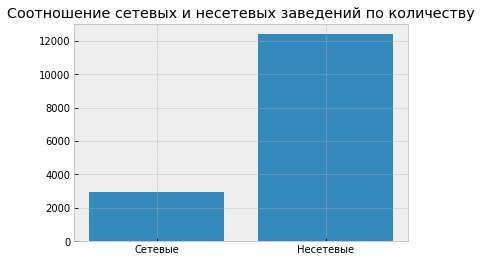

In [12]:
plt.bar(df2['chain'], df2['id'])
plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.xticks(rotation=0)
plt.show()

**Построим график распределения объектов общественного питания сетевого типа:**

In [13]:
df_chain = df.query('chain == "да" ')
df_chain_pivot = df_chain.pivot_table(index = 'object_type', values='id', aggfunc='count').reset_index()
#plt.figure(figsize=(12,6))
#plt.bar(df_chain_pivot['object_type'], df_chain_pivot['id'])
#plt.title('Распределение объектов общественного питания сетевого типа')
#plt.xticks(rotation=90)
#plt.show()

,object_type,id_x,id_y,object_perc
6,предприятие быстрого обслуживания,791,1923,41.13
5,магазин (отдел кулинарии),78,273,28.57
7,ресторан,544,2285,23.81
3,кафе,1396,6099,22.89
2,закусочная,56,360,15.56
4,кафетерий,52,398,13.07
0,бар,37,856,4.32
1,буфет,11,585,1.88
8,столовая,3,2587,0.12


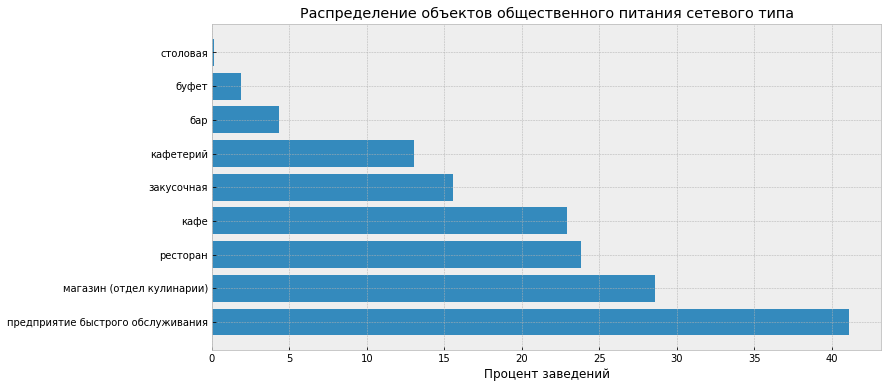

In [14]:
df_chain_pivot = df_chain_pivot.merge(df1, on='object_type', how='left')
df_chain_pivot['object_perc'] = ((df_chain_pivot['id_x'] / df_chain_pivot['id_y'])*100).round(2)
df_chain_pivot = df_chain_pivot.sort_values(by='object_perc', ascending=False)
display(df_chain_pivot)
plt.figure(figsize=(12,6))
plt.barh(df_chain_pivot['object_type'], df_chain_pivot['object_perc'])
plt.title('Распределение объектов общественного питания сетевого типа')
plt.xlabel('Процент заведений')
plt.show()

**Построим график распределения среднего числа мест по количеству заведений в сети.**

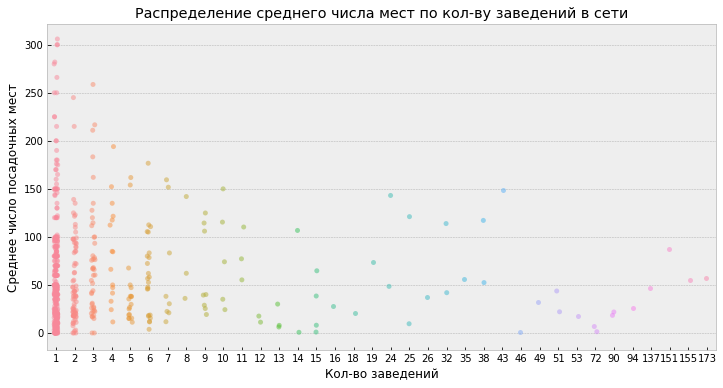

In [15]:
result = df_chain.pivot_table(index='object_name', values='number', aggfunc=['count', 'mean']) # построим сводную
result.columns = ['count', 'mean_numb'] # переименуем колонки
plt.figure(figsize=(12,6))
sns.stripplot(x='count', y='mean_numb', data=result, alpha=0.5)
plt.title('Распределение среднего числа мест по кол-ву заведений в сети')
plt.xlabel('Кол-во заведений')
plt.ylabel('Среднее число посадочных мест')
plt.show() 

Интересное замечание по исходным данным, вроде как выбрали только сетевой тип, но как много "единичных" заведений на графике.

In [16]:
result.sort_values(by='count', ascending=False).head(10) #Топ10 сетевых заведений по кол-ву ресторанов 

,count,mean_numb
object_name,,
шоколадница,173,57.236994
kfc,155,55.341935
макдоналдс,151,87.119205
бургер кинг,137,46.649635
теремок,94,25.606383
домино'с пицца,90,18.344444
крошка картошка,90,21.855556
суши wok,72,6.708333
милти,72,1.333333


Исходя из графика можем сделать **вывод**, что сетевые заведения с большим числом ресторанов, как правило, ограничиваются сотней или меньше посадочных мест.

**Среднее количество посадочных мест.** Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. В среднем самое большое количество посадочных мест предоставляют столовые. Построим график.

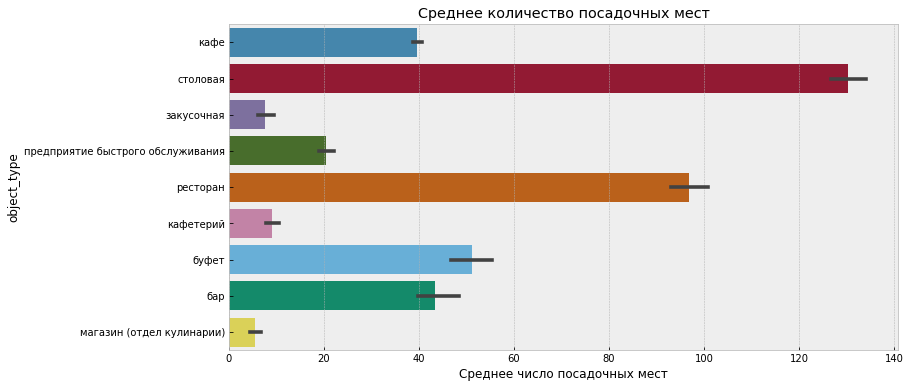

In [17]:
plt.figure(figsize=(12,6))
ax=sns.barplot(y='object_type', x='number', data=df)
plt.title('Среднее количество посадочных мест')
plt.xlabel('Среднее число посадочных мест')
plt.show()

По количеству посадочных мест все типы заведений можно распределить по трем основным группам: 
- Малые, до 20 посадочных мест - закусочные, кафетерий, фаст-фуд, магазин(отд. кулинарии)
- Средние, от 40 до 50 посадочных мест - кафе, буфет, бар
- Большие, от 60 посадочных мест - рестораны и столовые

**Выделим в отдельный столбец информацию об улице из столбца address:**

def extr_street(x): # создадим функцию, которая будет сплитить строку по запятой и возвращать элемент с индексом 1
    return x.split(',')[1]

In [18]:
def extr_street(x): # создадим функцию, которая будет сплитить строку по запятой и возвращать элемент с индексом 1
    return x.split(',')[1]

In [19]:
df['streetname']=df.address.apply(extr_street) # применим нашу функцию и создадим столбец 'streetname'
df['streetname']=df['streetname'].str.strip() # уберем пропуски
df

,id,object_name,chain,object_type,address,number,streetname
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский


**Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?**

In [20]:
from io import BytesIO # импортируем датафрейм московских улиц с привязкой к району и округу
import requests
spreadsheet_id = '1DX6D-Hv6YMkfHbiMvgwM8zLVQCaE7Fx7UnSwArPk8N8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
msc_streets = pd.read_csv(BytesIO(r.content))
msc_streets

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [21]:
#msc_streets = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
#msc_streets # импортируем датафрейм московских улиц с привязкой к району и округу

In [22]:
report = df.merge(msc_streets, on='streetname', how='left') # соединим с исходным датафреймом df
report

,id,object_name,chain,object_type,address,number,streetname,areaid,okrug,area
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,86.0,СВАО,Ярославский Район
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,18.0,ЦАО,Таганский район
2,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,117.0,ЮВАО,Нижегородский район
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,133.0,ЮЗАО,Район Южное Бутово
4,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,18.0,ЦАО,Таганский район
...,...,...,...,...,...,...,...,...,...,...
30419,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал,13.0,ЦАО,Басманный район
30420,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал,18.0,ЦАО,Таганский район
30421,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал,13.0,ЦАО,Басманный район
30422,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский,NaN,NaN,NaN


In [23]:
df['streetname'].value_counts().head(10) # посмотрим топ10 улиц по кол-ву заведений

город Зеленоград          232
проспект Мира             204
Профсоюзная улица         182
Ленинградский проспект    171
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
поселение Сосенское       138
проспект Вернадского      132
Кутузовский проспект      114
Name: streetname, dtype: int64

Наблюдаем определенную проблему с нашим алгоритмом выделения улиц, в данных оказался город Зеленоград и поселение Сосенское. Профильтруем, построим график и посчитаем улицы с одним заведением.

In [24]:
df_st = df[(df['streetname'] != "город Зеленоград") & (df['streetname'] != "поселение Сосенское")] # фильтр

df_st_top = df_st['streetname'].value_counts().reset_index() # топ-10
df_st_top.columns = ['streetname', 'count']

report_10 = df_st_top.head(10)

df_one = df_st_top[(df_st_top['count'] == 1)] # улицы с одним заведением
print('Количество улиц с одним заведением:', df_one['count'].sum())
display(report_10) # выведем топ-10
display(df_one) # выведем улицы с одним заведением

Количество улиц с одним заведением: 579


,streetname,count
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


,streetname,count
1319,дом 9,1
1320,дом 19,1
1321,Тарусская улица,1
1322,2-я Сокольническая улица,1
1323,Жуков проезд,1
...,...,...
1893,Большой Николопесковский переулок,1
1894,Ащеулов переулок,1
1895,Никитский переулок,1
1896,2-й Щемиловский переулок,1


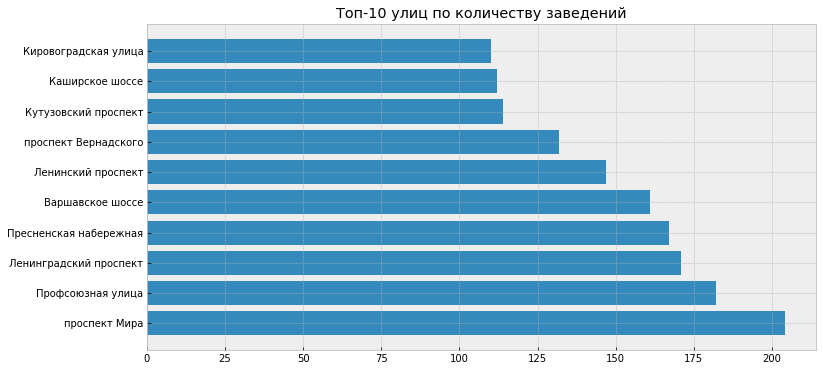

In [25]:
plt.figure(figsize=(12,6))
plt.barh(report_10['streetname'], report_10['count'])
plt.title('Топ-10 улиц по количеству заведений')
plt.show()

Теперь ответим на вопрос в каких районах находятся наши улицы с самым большим количеством заведений и всего с одним заведением, обратимся опять к фрейму msc_streets

In [26]:
area_max=report_10.merge(msc_streets, on='streetname', how='left')
display(area_max)

,streetname,count,areaid,okrug,area
0,проспект Мира,204,70,СВАО,Алексеевский район
1,проспект Мира,204,86,СВАО,Ярославский Район
2,проспект Мира,204,78,СВАО,Район Марьина роща
3,проспект Мира,204,79,СВАО,Останкинский район
4,проспект Мира,204,81,СВАО,Район Ростокино
5,проспект Мира,204,82,СВАО,Район Свиблово
6,проспект Мира,204,16,ЦАО,Мещанский район
7,Профсоюзная улица,182,123,ЮЗАО,Академический район
8,Профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,134,ЮЗАО,Район Ясенево


In [27]:
#создадим фрейм округов
okrug = pd.DataFrame({'okrug':['ЦАО', 'ЮЗАО', 'САО', 'ЦАО', 'ЮАО', 'ЦАО', 'ЗАО', 'ЗАО', 'ЮАО', 'ЮАО']}) 
new=report_10.join(okrug) # присоединим его к нашему топу улиц
new

,streetname,count,okrug
0,проспект Мира,204,ЦАО
1,Профсоюзная улица,182,ЮЗАО
2,Ленинградский проспект,171,САО
3,Пресненская набережная,167,ЦАО
4,Варшавское шоссе,161,ЮАО
5,Ленинский проспект,147,ЦАО
6,проспект Вернадского,132,ЗАО
7,Кутузовский проспект,114,ЗАО
8,Каширское шоссе,112,ЮАО
9,Кировоградская улица,110,ЮАО


In [28]:
new_report=new.groupby('okrug')['count'].sum().reset_index().sort_values(by='count', ascending=False)
new_report

,okrug,count
2,ЦАО,518
3,ЮАО,383
0,ЗАО,246
4,ЮЗАО,182
1,САО,171


Таким образом, наглядно видим какой округ лидирует по количеству заведений и это округ ЦАО.

In [29]:
area_min=df_one.merge(msc_streets, on='streetname', how='left') # также присоединим округа к улицам с одним заведением
area_min 

,streetname,count,areaid,okrug,area
0,дом 9,1,NaN,NaN,NaN
1,дом 19,1,NaN,NaN,NaN
2,Тарусская улица,1,134.0,ЮЗАО,Район Ясенево
3,2-я Сокольническая улица,1,26.0,ВАО,Район Сокольники
4,Жуков проезд,1,14.0,ЦАО,Район Замоскворечье
...,...,...,...,...,...
617,Большой Николопесковский переулок,1,12.0,ЦАО,Район Арбат
618,Ащеулов переулок,1,15.0,ЦАО,Красносельский район
619,Никитский переулок,1,19.0,ЦАО,Тверской район
620,2-й Щемиловский переулок,1,19.0,ЦАО,Тверской район


**Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?**

In [30]:
temp=report_10.merge(df, on='streetname', how='left') # присоединим все заведения к топовым улицам

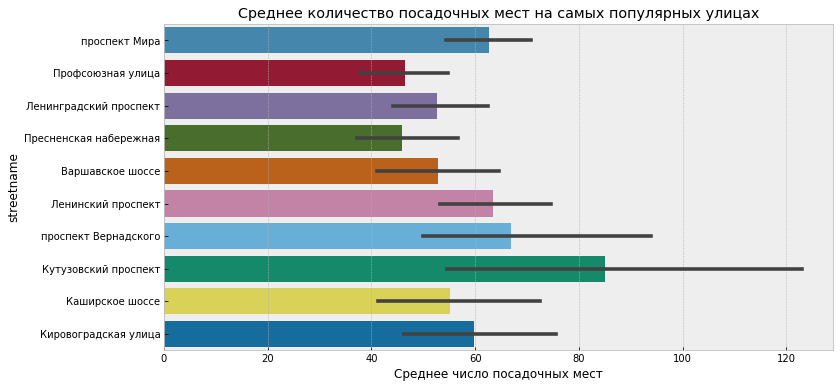

In [31]:
plt.figure(figsize=(12,6))
ax=sns.barplot(y='streetname', x='number', data=temp)
plt.title('Среднее количество посадочных мест на самых популярных улицах')
plt.xlabel('Среднее число посадочных мест')
plt.show()

Как мы можем наблюдать из графика, среднее количество посадочных мест на самых популярных улицах лежит в диапазоне от 40 до 60 мест. Исходя из исследований, что мы сделали ранее, такое количество мест свойственно таким заведениям как кафе и бары.

## Общий вывод
Проведя анализ рынка заведений общественного питания Москвы можно дать следующие заключения:
1. Рекомендуем тип заведения - кафе, бар
2. Количество посадочных мест - 40-60
3. Выделить конкретный район сложно, потому что топовые улицы имеют большую протяженность и затрагивают сразу несколько районов Москвы. Однако, исходя из данных, что кафе будет небольшим, проект дорогой и роботы-персонал, стоит обратить внимание на округ ЦАО. Даже, когда местные насмотрятся на новшество в виде роботов, в данном округе останется постоянный трафик туристов
4. Пару слов о дальнейшем развитии. Исходя из общего числа кафе и баров, 6000 и 800 соответственно, из которых 1400 и 40 соответственно принадлежат к сетевому типу, делаем вывод, что каждое 4ое кафе и каждый 20й бар принадлежат к какой-то сети. 

Презентация: https://docs.google.com/presentation/d/1ikQvJjKuWouVan-3AfA3iIZQ_GCMAV1Ddtqbl33KSpY/edit?usp=sharing